<a href="https://colab.research.google.com/github/justinzhao07/fastai/blob/main/FastAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

     |████████████████████████████████| 719 kB 25.2 MB/s 
     |████████████████████████████████| 4.4 MB 57.5 MB/s 
     |████████████████████████████████| 1.2 MB 51.0 MB/s 
     |████████████████████████████████| 362 kB 34.8 MB/s 
     |████████████████████████████████| 212 kB 72.4 MB/s 
     |████████████████████████████████| 101 kB 15.2 MB/s 
     |████████████████████████████████| 140 kB 73.6 MB/s 
     |████████████████████████████████| 1.1 MB 63.7 MB/s 
     |████████████████████████████████| 596 kB 46.9 MB/s 
     |████████████████████████████████| 127 kB 74.9 MB/s 
     |████████████████████████████████| 271 kB 77.7 MB/s 
     |████████████████████████████████| 144 kB 71.8 MB/s 
     |████████████████████████████████| 94 kB 4.8 MB/s 
     |████████████████████████████████| 6.6 MB 68.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.1

In [ ]:
#id first_training
#caption Results from the first training
# CLICK ME

from fastai.vision.all import *
# path = untar_data(URLs.PETS)/'images'

# def is_cat(x): return x[0].isupper()
# dls = ImageDataLoaders.from_name_func(
#     path, get_image_files(path), valid_pct=0.2, seed=42,
#     label_func=is_cat, item_tfms=Resize(224))

# learn = vision_learner(dls, resnet34, metrics=error_rate)
# learn.fine_tune(1)

In [ ]:
#hide_output
# uploader = widgets.FileUpload()
# uploader

In [ ]:
# img = PILImage.create(uploader.data[0])
# is_cat,_,probs = learn.predict(img)
# print(f"Is this a cat?: {is_cat}.")
# print(f"Probability it's a cat: {probs[1].item():.6f}")

In [ ]:
# path = untar_data(URLs.CAMVID_TINY)
# dls = SegmentationDataLoaders.from_label_func(
#     path, bs=8, fnames = get_image_files(path/"images"),
#     label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
#     codes = np.loadtxt(path/'codes.txt', dtype=str)
# )

# learn = unet_learner(dls, resnet34)
# learn.fine_tune(8)

In [ ]:
# learn.show_results(max_n=6, figsize=(7,8))

In [ ]:
# from fastai.text.all import *

# dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
# learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
# learn.fine_tune(4, 1e-2)

In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', 'b9f6bf4909244942acc0d0b72a82f2b8')

In [ ]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('contentUrl')
len(ims)

150

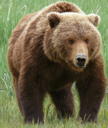

In [ ]:
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [ ]:
fns = get_image_files(path)
fns

(#436) [Path('bears/teddy/00000020.jpg'),Path('bears/teddy/00000086.jpg'),Path('bears/teddy/00000126.jpg'),Path('bears/teddy/00000071.png'),Path('bears/teddy/00000012.jpeg'),Path('bears/teddy/00000053.jpg'),Path('bears/teddy/00000109.jpg'),Path('bears/teddy/00000127.png'),Path('bears/teddy/00000097.jpg'),Path('bears/teddy/00000146.png')...]

In [ ]:
failed = verify_images(fns)
failed
failed.map(Path.unlink);

In [ ]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [ ]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

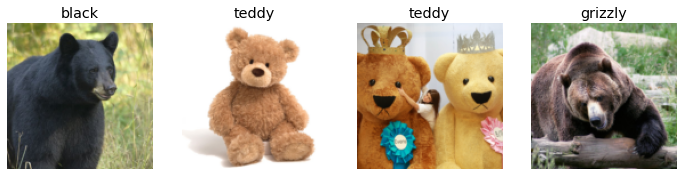

In [ ]:
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.306761,0.173635,0.069767,00:29


epoch,train_loss,valid_loss,error_rate,time
0,0.110046,0.062337,0.011628,00:29
1,0.081372,0.053036,0.034884,00:28
2,0.056316,0.086948,0.034884,00:29
3,0.043727,0.103322,0.034884,00:28


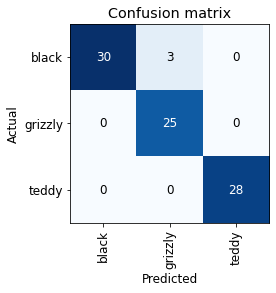

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

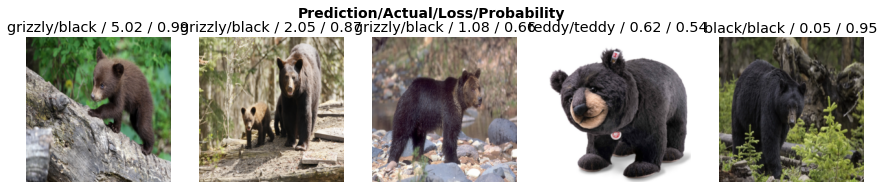

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
# cleaner = ImageClassifierCleaner(learn)
# cleaner

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', TensorBase(1), TensorBase([3.1375e-05, 9.9997e-01, 2.8848e-06]))

In [ ]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [ ]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 1.0000')

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

NameError: ignored

In [1]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 26.6 MB/s 
     |████████████████████████████████| 344 kB 68.5 MB/s 
     |████████████████████████████████| 132 kB 67.2 MB/s 
     |████████████████████████████████| 70 kB 8.1 MB/s 
     |████████████████████████████████| 112 kB 62.1 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 561 kB 66.1 MB/s 
     |████████████████████████████████| 423 kB 66.4 MB/s 
     |████████████████████████████████| 80 kB 8.8 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 133 kB 43.6 MB/s 
  Created wheel for json5: filename=json5-0.9.8-py2.py3-none-any.whl size=18604 sha256=166dc051820db21d18e87b4548efba50d0cec70baafb6d2bbb9331a3ae44a7a8
  Stored in directory: /root/.cache/pip/wheels/ac/9b/de/6e4fd8f159d3dfa42c42ceddf2184fda29ea7fb1e8f5f8371c
Successfully

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
      voila  OK
